In [5]:
import pandas as pd

df = pd.read_csv('data/all_clinical_data.csv')

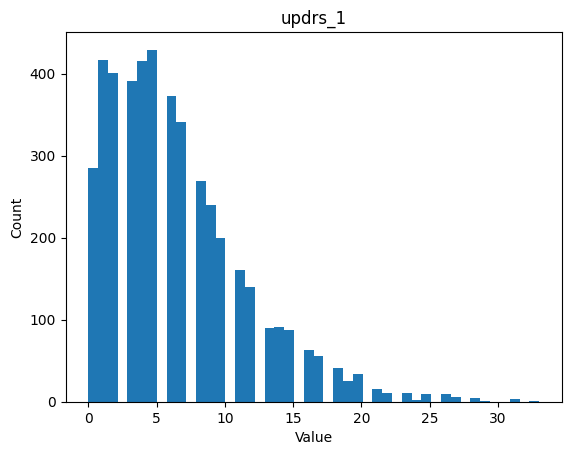

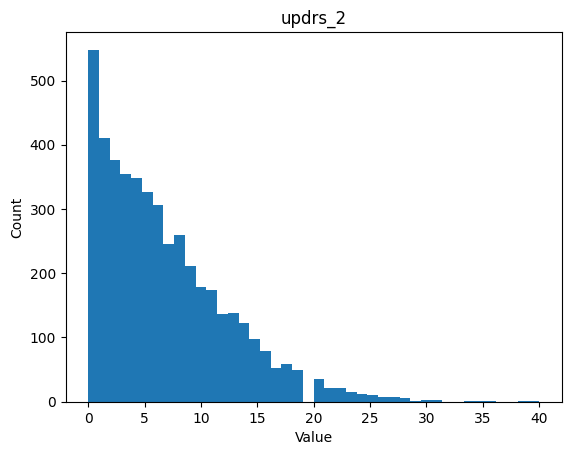

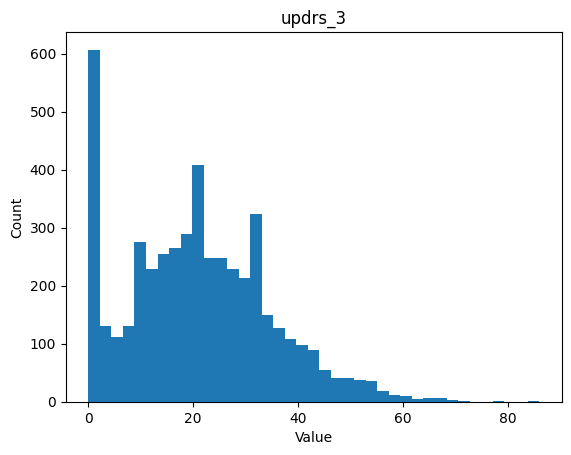

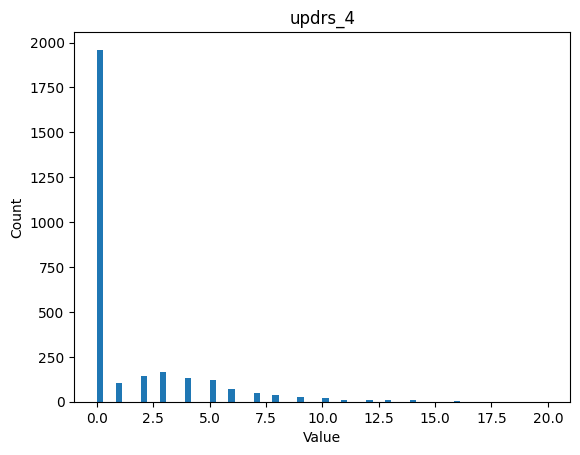

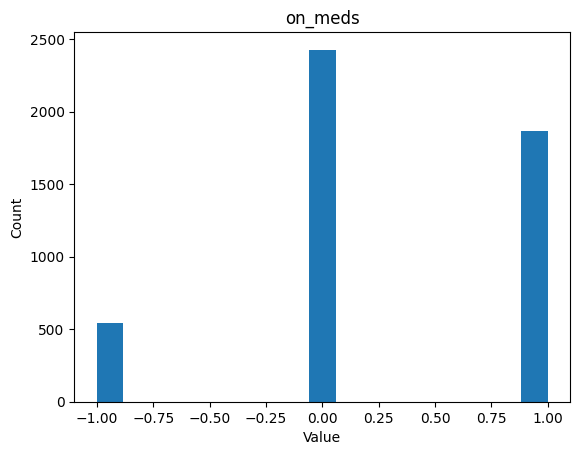

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming your DataFrame is named 'df'
for col in ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'on_meds']:
    plt.figure()
    plt.hist(df[col], bins='auto')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()


Fill forward, then backward or vice versa

Imput missing updrs values from other values (knn?)

Use average

Use 0 (unlikely score?)

In [34]:
patient_data = {}
for patient_id in df['patient_id'].unique():
    patient_subset = df.loc[df['patient_id'] == patient_id].copy()

    if patient_subset['updrs_4'].isna().all():
        df.loc[df['patient_id'] == patient_id, 'updrs_4'] = 0
        
    patient_subset = patient_subset.interpolate()
    patient_subset = patient_subset.fillna(method='ffill')
    patient_subset = patient_subset.fillna(method='bfill')

    patient_data[patient_id] = patient_subset


In [69]:
# Create an empty dictionary to store updated patient data
updated_patient_data = {}

# Loop over unique patient IDs in the original dataframe
for patient_id in df['patient_id'].unique():

    # Extract a patient subset from the original dataframe
    patient_subset = df.loc[df['patient_id'] == patient_id].copy()
    
    # If the patient subset contains more than one row, update it and store it in the updated_patient_data dictionary
    if len(patient_subset) > 1:
        # If all values in the 'updrs_4' column are NaN, replace them with 0 for that patient
        if patient_subset['updrs_4'].isna().all():
            df.loc[df['patient_id'] == patient_id, 'updrs_4'] = 0
        
        # Interpolate missing values in the patient subset
        patient_subset = patient_subset.interpolate()
    
        # Fill remaining missing values using forward and backward filling
        patient_subset = patient_subset.fillna(method='ffill')
        patient_subset = patient_subset.fillna(method='bfill')

        # Store the updated patient subset in the updated_patient_data dictionary
        updated_patient_data[patient_id] = patient_subset

# Overwrite the original patient_data dictionary with the updated_patient_data dictionary
patient_data = updated_patient_data

# Print the keys in the updated patient_data dictionary
print("Keys in the updated patient_data dictionary:", patient_data.keys())

# Print the head of the updated dataframe
print("Head of the updated dataframe:\n", df.head())


Keys in the updated patient_data dictionary: dict_keys([55, 942, 1517, 1923, 2660, 3636, 3863, 4161, 4172, 4923, 5027, 5036, 5178, 5645, 5742, 6054, 6211, 6420, 7051, 7117, 7151, 7265, 7508, 7568, 7832, 7886, 8344, 8699, 10053, 10138, 10174, 10541, 10715, 10718, 11459, 11686, 11928, 12516, 12636, 12703, 12755, 12931, 13360, 13368, 13618, 13804, 13852, 13968, 14035, 14124, 14242, 14270, 14344, 14450, 14811, 15009, 15245, 15504, 15590, 16238, 16347, 16566, 16574, 16778, 16931, 17154, 17201, 17414, 17727, 18183, 18204, 18553, 18560, 19088, 20212, 20216, 20352, 20404, 20460, 20581, 20664, 20707, 20791, 20792, 21126, 21537, 21729, 22126, 22623, 23175, 23192, 23244, 23391, 23636, 24278, 24690, 24818, 24820, 24911, 25562, 25739, 25750, 25827, 25911, 26005, 26104, 26210, 26809, 27079, 27300, 27464, 27468, 27607, 27715, 27872, 27893, 27971, 27987, 28327, 28342, 28818, 29313, 29417, 30119, 30155, 30416, 30894, 30951, 31121, 31154, 31270, 31693, 33108, 33548, 33558, 34182, 35231, 35465, 35477, 35

In [75]:
# Concatenate all patient subsets into one dataframe
normalized_df = pd.concat(patient_data.values(), ignore_index=True)

# Calculate the mean and standard deviation for each column
updrs_mean = df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].mean()
updrs_std = df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].std()

# Normalize each column using the calculated mean and standard deviation
normalized_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = (normalized_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] - updrs_mean) / updrs_std
normalized_df = normalized_df.fillna(0)
# Print the updated dataframe
print(normalized_df.head())

  visit_id  patient_id  visit_month   updrs_1   updrs_2   updrs_3   updrs_4   
0     55_0          55            0  0.687651 -0.111025 -0.432697 -0.451286  \
1     55_3          55            3  0.687651  0.062164  0.284364 -0.451286   
2     55_6          55            6  0.295773  0.581731  0.929718 -0.451286   
3     55_9          55            9  0.295773  0.408542  0.642894 -0.451286   
4    55_12          55           12  0.687651  0.581731  1.431661 -0.451286   

   on_meds  
0        0  
1        0  
2        0  
3        1  
4        1  


In [77]:
# Find all rows with NaN values
nan_rows = normalized_df[normalized_df.isna().any(axis=1)]

# Print the result
print(nan_rows)


Empty DataFrame
Columns: [visit_id, patient_id, visit_month, updrs_1, updrs_2, updrs_3, updrs_4, on_meds]
Index: []


In [78]:
normalized_df.to_csv('data/all_clinical_data_normalized.csv', index=False)